In [3]:

import numpy as np
import importlib
import itertools
import main_module as mm
import plot_module as pm
import networkx as nx
from matplotlib import pyplot as plt

In [4]:
importlib.reload(mm)
importlib.reload(pm)

<module 'plot_module' from '/Users/himeoka/Projects/point_of_no_return/StoichiometricRay/glycolysis/plot_module.py'>

In [8]:
file3D = 'result/WholeSpace_flip4_lb-6_experrtol0.2.txt'
file2D = 'result/2DSpace_z-1.7_flip4_lb-6_FPE-4.txt'

## Plot the non-returnable set with null-manifolds in a whole space

In [11]:
# ==== Initialize Plot =====
plot_range = {'xmin':9e-7,'ymin':9e-7,'zmin':2e-6,'xmax':1e3,'ymax':1e3,'zmax':1.0}
fig, x, y = pm.initialize(plot_range)

# ===== Add null-manifold surfaces =====
fig = pm.add_nulll_manifolds(fig, x, y, plot_range)

# ===== Add non-returnable points =====
fig, points = pm.add_non_returnable_points(fig,plot_range,filename=file3D,pointsize=0.4)

# ===== Add the two Attractors =====
fig = pm.add_attractors(fig,filename='result/glyc_survive_dead.csv')

# ===== Add the convex-hull =====
fig = pm.add_convex_hull(fig,points)

# ===== Add intersections of manifolds =====
fig = pm.add_intersection(fig,plot_range)

# ===== Plot =====
fig.show()


## X方向に動かしたときの軌道

In [104]:
# ==== Initialize Plot =====
plot_range = {'xmin':1e-6,'ymin':1e-6,'zmin':2e-6,'xmax':1e3,'ymax':1e3,'zmax':1.0}
fig, x, y = pm.initialize(plot_range)

# ===== Add null-manifold surfaces =====
fig = pm.add_nulll_manifolds(fig, x, y, plot_range)

# ===== Add non-returnable points =====
fig, points = pm.add_non_returnable_points(fig,plot_range,filename=file3D,pointsize=1e-5)

# ===== Add the two Attractors =====
fig = pm.add_attractors(fig,filename='result/glyc_survive_dead.csv')

# ===== Add the convex-hull =====
fig = pm.add_convex_hull(fig,points)

# ===== Add intersections of manifolds =====
fig = pm.add_intersection(fig, plot_range)

# ===== Add trajectories =====
fig = pm.add_trajectories(fig,filename = 'result/trajectory_X.txt')

# ===== Plot =====
fig.show()


## Y方向に動かしたときの軌道

In [106]:
# ==== Initialize Plot =====
plot_range = {'xmin':1e-6,'ymin':1e-6,'zmin':2e-6,'xmax':1e3,'ymax':1e3,'zmax':1.0}
fig, x, y = pm.initialize(plot_range)

# ===== Add null-manifold surfaces =====
fig = pm.add_nulll_manifolds(fig, x, y, plot_range)

# ===== Add non-returnable points =====
fig, points = pm.add_non_returnable_points(fig,plot_range,filename=file3D,pointsize=1e-5)

# ===== Add the two Attractors =====
fig = pm.add_attractors(fig,filename='result/glyc_survive_dead.csv')

# ===== Add the convex-hull =====
fig = pm.add_convex_hull(fig,points)

# ===== Add intersections of manifolds =====
fig = pm.add_intersection(fig, plot_range)

# ===== Add trajectories =====
fig = pm.add_trajectories(fig,filename = 'result/trajectory_Y.txt')

# ===== Plot =====
fig.show()


## 2次元で解析的に境界を出す
$\sigma=(-1,1,1,1,-1,1)$の領域（Xを動かした方）は、$z$を固定、$y$の関数として$$-\delta z=\delta x+n\delta y$$を満たす$x$を出す。


$\sigma=(-1,1,-1,1,1,1)$の領域（Yを動かした方）は、$z$を固定、$x$の関数として$$-\delta z=\delta x+n\delta y$$を満たす$y$を出す。


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/himeoka/Projects/point_of_no_return/StoichiometricRay/glycolysis/plot_module.py:69: RuntimeWarning: invalid value encountered in log10
  x_bnd0 = np.log10(goal[0] + goal[2] - 10**logz + 2*(goal[1] - 10**logy))
/Users/himeoka/Projects/point_of_no_return/StoichiometricRay/glycolysis/plot_module.py:70: RuntimeWarning: invalid value encountered in log10
  x_bnd1 = np.log10(goal[0] + goal[2] - 10**logz + 3*(goal[1] - 10**logy))
/Users/himeoka/Projects/point_of_no_return/StoichiometricRay/glycolysis/plot_module.py:77: RuntimeWarning: invalid value encountered in log10
  y_bnd0 = np.log10(goal[1] + (goal[2] - 10**logz + goal[0] - 10**logx)/2)
/Users/himeoka/Projects/point_of_no_return/StoichiometricRay/glycolysis/plot_module.py:78: RuntimeWarning: invalid value encountered in log10
  y_bnd1 = np.log10(goal[1] + (goal[2] - 10**logz 

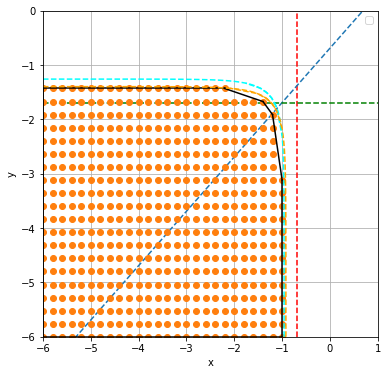

In [9]:
logz = -1.7

plot_range = {'xmin':1e-6,'ymin':1e-6,'xmax':10,'ymax':1}
# ===== initialize plot =====
x_values = pm.initialize_2d(plot_range)

# ===== tip point of the cone =====
goal = np.array([0.1,0.01,0.01])

# ===== add null manifold =====
pm.add_null_manifold_2d(x_values, logz)

# ===== add convex hull =====
pm.add_convex_hull_2d(filename=file2D)

# ===== add analytic boundary =====
pm.add_boundary_2d(plot_range, goal, logz)

# 描画
plt.savefig("boundary.png", format="png", dpi=512)
plt.show()

## 各部分集合$W_{\bm \sigma}$で作れる標準基底

緑の曲面より下、青・赤の曲面よりも上という領域がCubicモデルだと存在できる。この領域では$S_{*0},S_{*2},S_{*4}$の正線型結合で
$$
\begin{pmatrix}
1\\0\\-1
\end{pmatrix}
+
\begin{pmatrix}
-1\\1\\-1
\end{pmatrix}
+
\begin{pmatrix}
0\\-1\\3
\end{pmatrix}
=
\begin{pmatrix}
0\\0\\1
\end{pmatrix}
$$
がつくれる。

これと$S_{*0}$を足すと
$$
\begin{pmatrix}
1\\0\\-1
\end{pmatrix}
+
\begin{pmatrix}
0\\0\\1
\end{pmatrix}
=
\begin{pmatrix}
1\\0\\0
\end{pmatrix}
$$
がつくれて、これらと$S_{*2}$を足すことで
$$
\begin{pmatrix}
-1\\1\\-1
\end{pmatrix}
+
\begin{pmatrix}
1\\0\\0
\end{pmatrix}
+
\begin{pmatrix}
0\\0\\1
\end{pmatrix}
=
\begin{pmatrix}
0\\1\\0
\end{pmatrix}
$$
が作れる。つまり全ての成分を独立に増やすことができる。CubicモデルではDeathもLiveもこの領域にいて、全成分の濃度がDeathではLiveよりも低いのでこれで生き返れる。


### 各空間で作れる独立基底 & 空間の存在チェック


In [8]:
importlib.reload(pm)
G = nx.DiGraph()
v, k = mm.get_param()[:2]
S = mm.get_stoichiometry()
possible_signs = list(itertools.product([1,-1], repeat=4))
for i, s in enumerate(possible_signs):
    sign = [s[0], 1, s[1], s[2], s[3], 1]
    if pm.region_existence(sign, k):
        print(i,sign)
        basis = pm.standard_basis(sign, S, v, k)
        print(basis,len(basis))
        G.add_node(i,data=np.array(sign))


objvals = []
# Add edges
for nodes in itertools.combinations(G.nodes, 2):
    n1, n2 = nodes
    if mm.hamming_distance(G.nodes[n1]['data'], G.nodes[n2]['data']) == 1:
        objval = pm.region_transitivity(G.nodes[n1]['data'], G.nodes[n2]['data'])
        objvals.append(objval)
        if objval < 1e-9:
            G.add_edge(n1, n2)  
        
        objval = pm.region_transitivity(G.nodes[n2]['data'], G.nodes[n1]['data'])
        objvals.append(objval)
        if objval < 1e-9:
            G.add_edge(n2, n1)  
          
    

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-07
0 [1, 1, 1, 1, 1, 1]
[array([-1.,  0.,  0.]), array([ 0., -1.,  0.]), array([ 0.,  0., -1.])] 3
1 [1, 1, 1, 1, -1, 1]
[array([-1.,  0.,  0.]), array([ 0., -1.,  0.]), array([ 0.,  0., -1.])] 3
2 [1, 1, 1, -1, 1, 1]
[array([0., 0., 1.]), array([-1.,  0.,  0.]), array([ 0., -1.,  0.])] 3
3 [1, 1, 1, -1, -1, 1]
[array([0., 1., 0.]), array([0., 0., 1.]), array([-1.,  0.,  0.]), array([ 0., -1.,  0.]), array([ 0.,  0., -1.])] 5
4 [1, 1, -1, 1, 1, 1]
[array([-1.,  0.,  0.]), array([ 0., -1.,  0.]), array([ 0.,  0., -1.])] 3
5 [1, 1, -1, 1, -1, 1]
[array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.]), array([-1.,  0.,  0.]), array([ 0., -1.,  0.]), array([ 0.,  0., -1.])] 6
6 [1, 1, -1, -1, 1, 1]
[array([0., 0., 1.]), array([ 0., -1.,  0.])] 2
7 [1, 1, -1, -1, -1, 1]
[array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.]), array([-1.,  0.,  0.]), array([ 0., -1.,  0.]), array([ 0.,  0., 

## 遷移ネットワークによる説明は無理そう

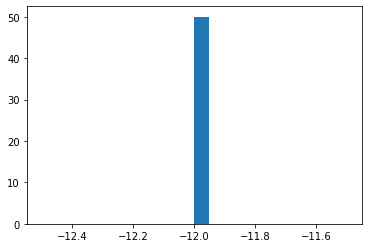

In [9]:
# plot distribution of objvals
import matplotlib.pyplot as plt
plt.hist([np.log10(val+1e-12) for val in objvals], bins=20)
plt.show()

全結合になってしまう


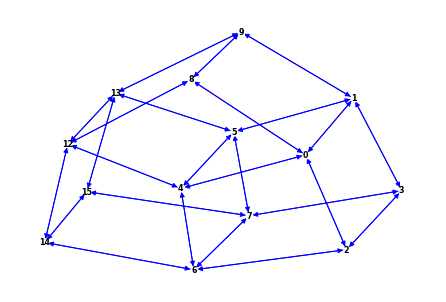

In [10]:
# draw netwrok
pos = nx.spring_layout(G, seed=4, iterations=1000, k=1.0, scale=1.0, center=(0,0))
nx.draw(G, pos, with_labels=True, node_color="w", edge_color="b", font_size=8, node_size=50, font_color="k", font_weight="bold")
